# Data Retrieval

[![Binder](https://notebooks.gesis.org/binder/badge_logo.svg)](https://notebooks.gesis.org/binder/v2/gh/AyrtonB/Merit-Order-Effect/main?filepath=nbs%2Fug-05-data-retrieval.ipynb)

This notebook outlines the retrieval of data from Electric Insights and Energy Charts using the `moepy` library. This data will be used in later user-guide notebooks.

<br>

### Imports

In [1]:
from moepy import retrieval, eda

<br>

### Electric Insights

To download data from all of the electric insights streams is as simple as calling `get_EI_data` and specifying the start and end dates. The data will be retrieved in 3 month batches as this is the maximum limit currently allowed by the API, you can change the `freq` parameter to adjust this.

Please save data once downloaded to avoid needless calls to the API.

In [2]:
start_date = '2010-01-01'
end_date = '2020-12-31'

df_EI = retrieval.get_EI_data(start_date, end_date)
df_EI.to_csv('../data/ug/electric_insights.csv')

df_EI.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 45/45 [08:51<00:00, 11.81s/it]


,day_ahead_price,SP,imbalance_price,valueSum,temperature,TCO2_per_h,gCO2_per_kWh,nuclear,biomass,coal,...,demand,pumped_storage,wind_onshore,wind_offshore,belgian,dutch,french,ireland,northern_ireland,irish
local_datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00+00:00,32.91,1.0,55.77,55.77,1.1,16268.0,429.0,7.897,0,9.902,...,37.948,-0.435,None,None,0.0,0.0,1.963,0.0,0.0,-0.234
2010-01-01 00:30:00+00:00,33.25,2.0,59.89,59.89,1.1,16432.0,430.0,7.897,0,10.074,...,38.227,-0.348,None,None,0.0,0.0,1.974,0.0,0.0,-0.236
2010-01-01 01:00:00+00:00,32.07,3.0,53.15,53.15,1.1,16318.0,431.0,7.893,0,10.049,...,37.898,-0.424,None,None,0.0,0.0,1.983,0.0,0.0,-0.236
2010-01-01 01:30:00+00:00,31.99,4.0,38.48,38.48,1.1,15768.0,427.0,7.896,0,9.673,...,36.918,-0.575,None,None,0.0,0.0,1.983,0.0,0.0,-0.236
2010-01-01 02:00:00+00:00,31.47,5.0,37.70,37.70,1.1,15250.0,424.0,7.900,0,9.370,...,35.961,-0.643,None,None,0.0,0.0,1.983,0.0,0.0,-0.236


<br>

We'll visualise the time-series of output by fuel in the style of [this paper](https://www.sciencedirect.com/science/article/pii/S0301421516307017), the author of which was also a creator of the Electric Insights site.

<AxesSubplot:ylabel='Generation (GW)'>

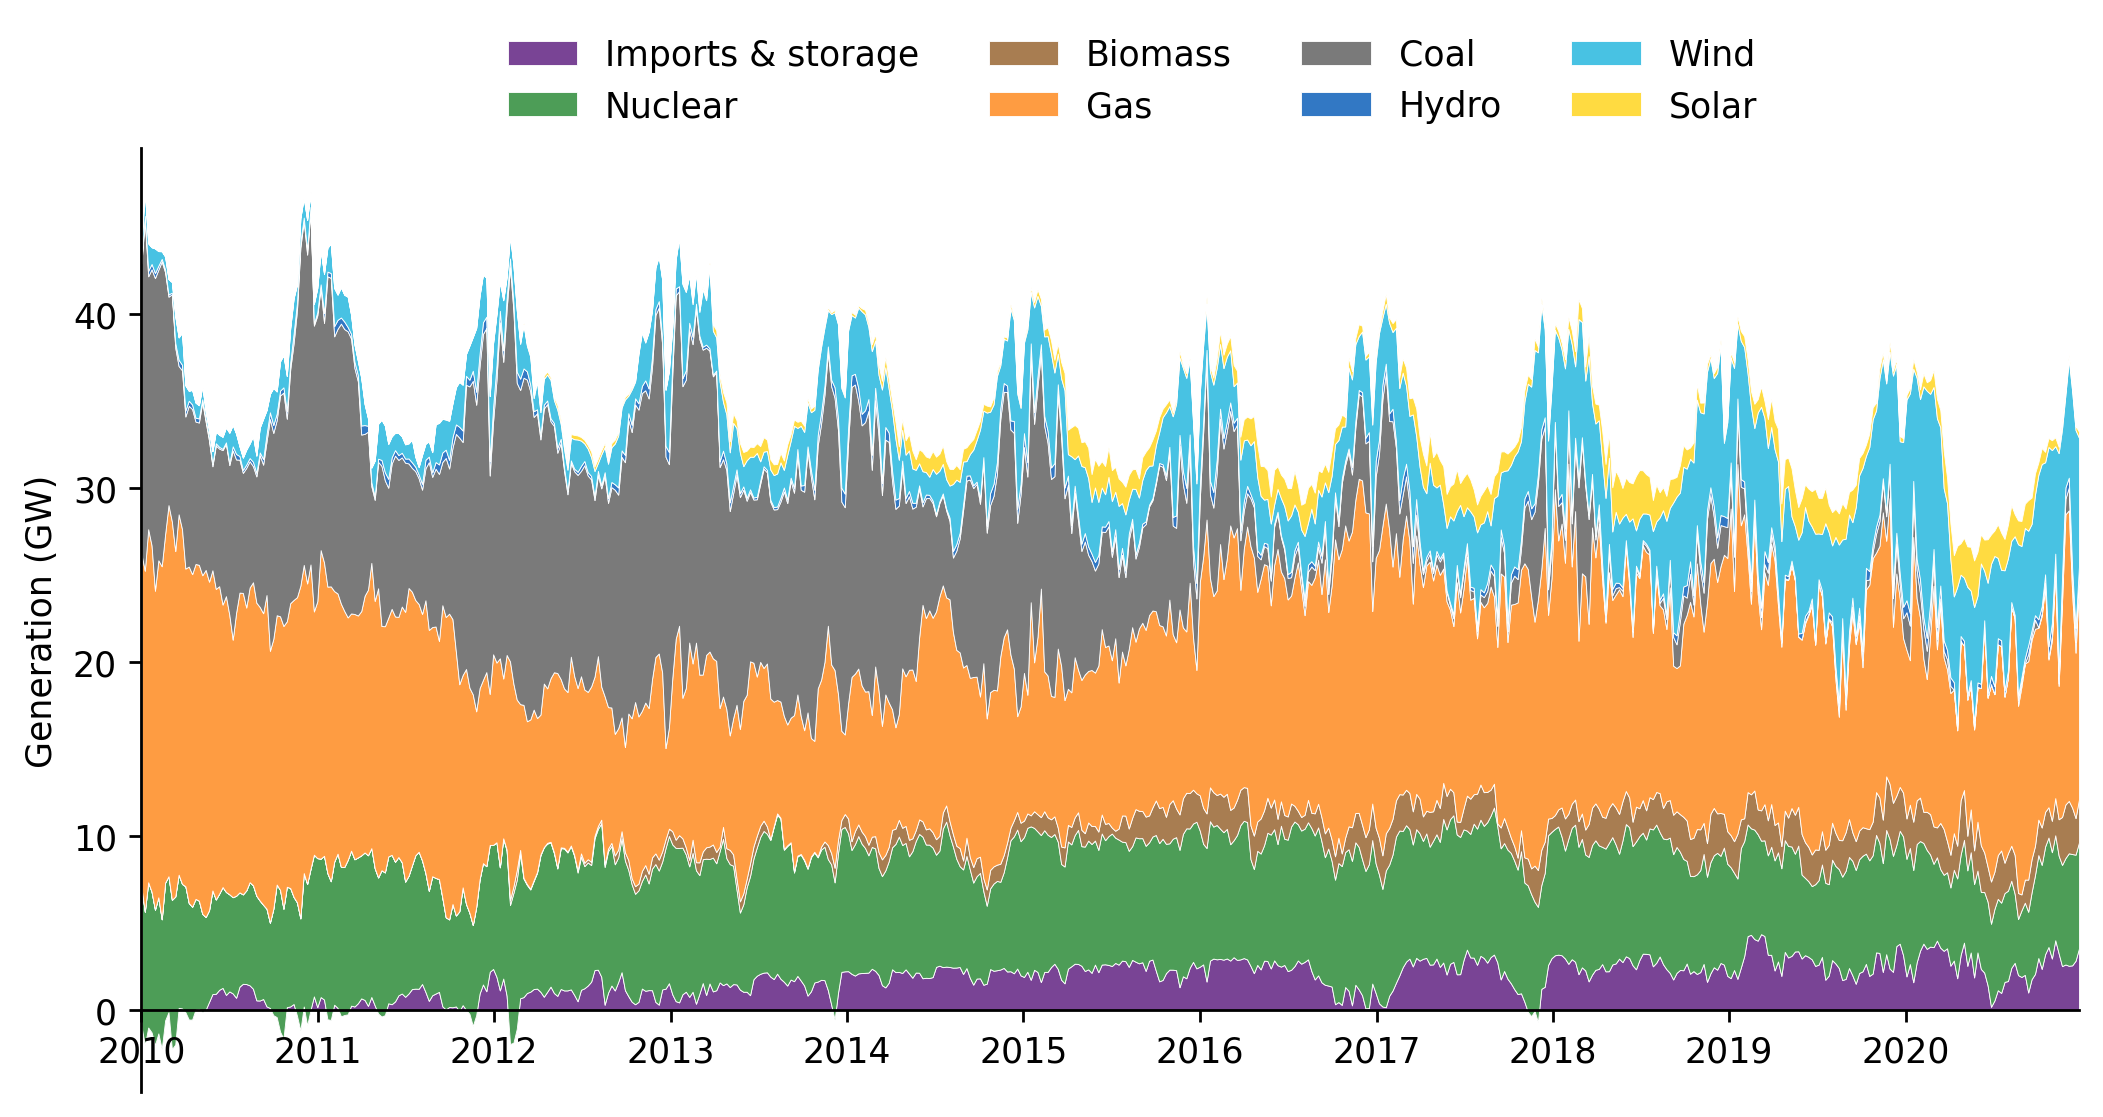

In [3]:
df_EI_plot = eda.clean_EI_df_for_plot(df_EI, freq='7D')

eda.stacked_fuel_plot(df_EI_plot, dpi=250)

<br>

### Energy Charts

To download fuel generation data from the energy charts site call `get_EC_data` and specify the start and end dates. 

As before, please save data once downloaded.

In [4]:
df_EC = retrieval.get_EC_data(start_date, end_date)
        
df_EC.head()

100%|████████████████████████████████████████████████████████████████████████████████| 576/576 [05:02<00:00,  1.91it/s]


,Biomass,Brown Coal,Gas,Hard Coal,Hydro Power,Oil,Others,Pumped Storage,Seasonal Storage,Solar,Uranium,Wind,Net Balance
local_datetime,,,,,,,,,,,,,
2010-01-04 00:00:00+01:00,3.637,16.533,4.726,10.078,2.331,0.000,0.0,0.052,0.068,0.0,16.826,0.635,-1.229
2010-01-04 01:00:00+01:00,3.637,16.544,4.856,8.816,2.293,0.000,0.0,0.038,0.003,0.0,16.841,0.528,-1.593
2010-01-04 02:00:00+01:00,3.637,16.368,5.275,7.954,2.299,0.000,0.0,0.032,0.000,0.0,16.846,0.616,-1.378
2010-01-04 03:00:00+01:00,3.637,15.837,5.354,7.681,2.299,0.000,0.0,0.027,0.000,0.0,16.699,0.630,-1.624
2010-01-04 04:00:00+01:00,3.637,15.452,5.918,7.498,2.301,0.003,0.0,0.020,0.000,0.0,16.635,0.713,-0.731


<br>

Once again we'll visualise the long-term average output time-series separated by fuel-type

<AxesSubplot:ylabel='Generation (GW)'>

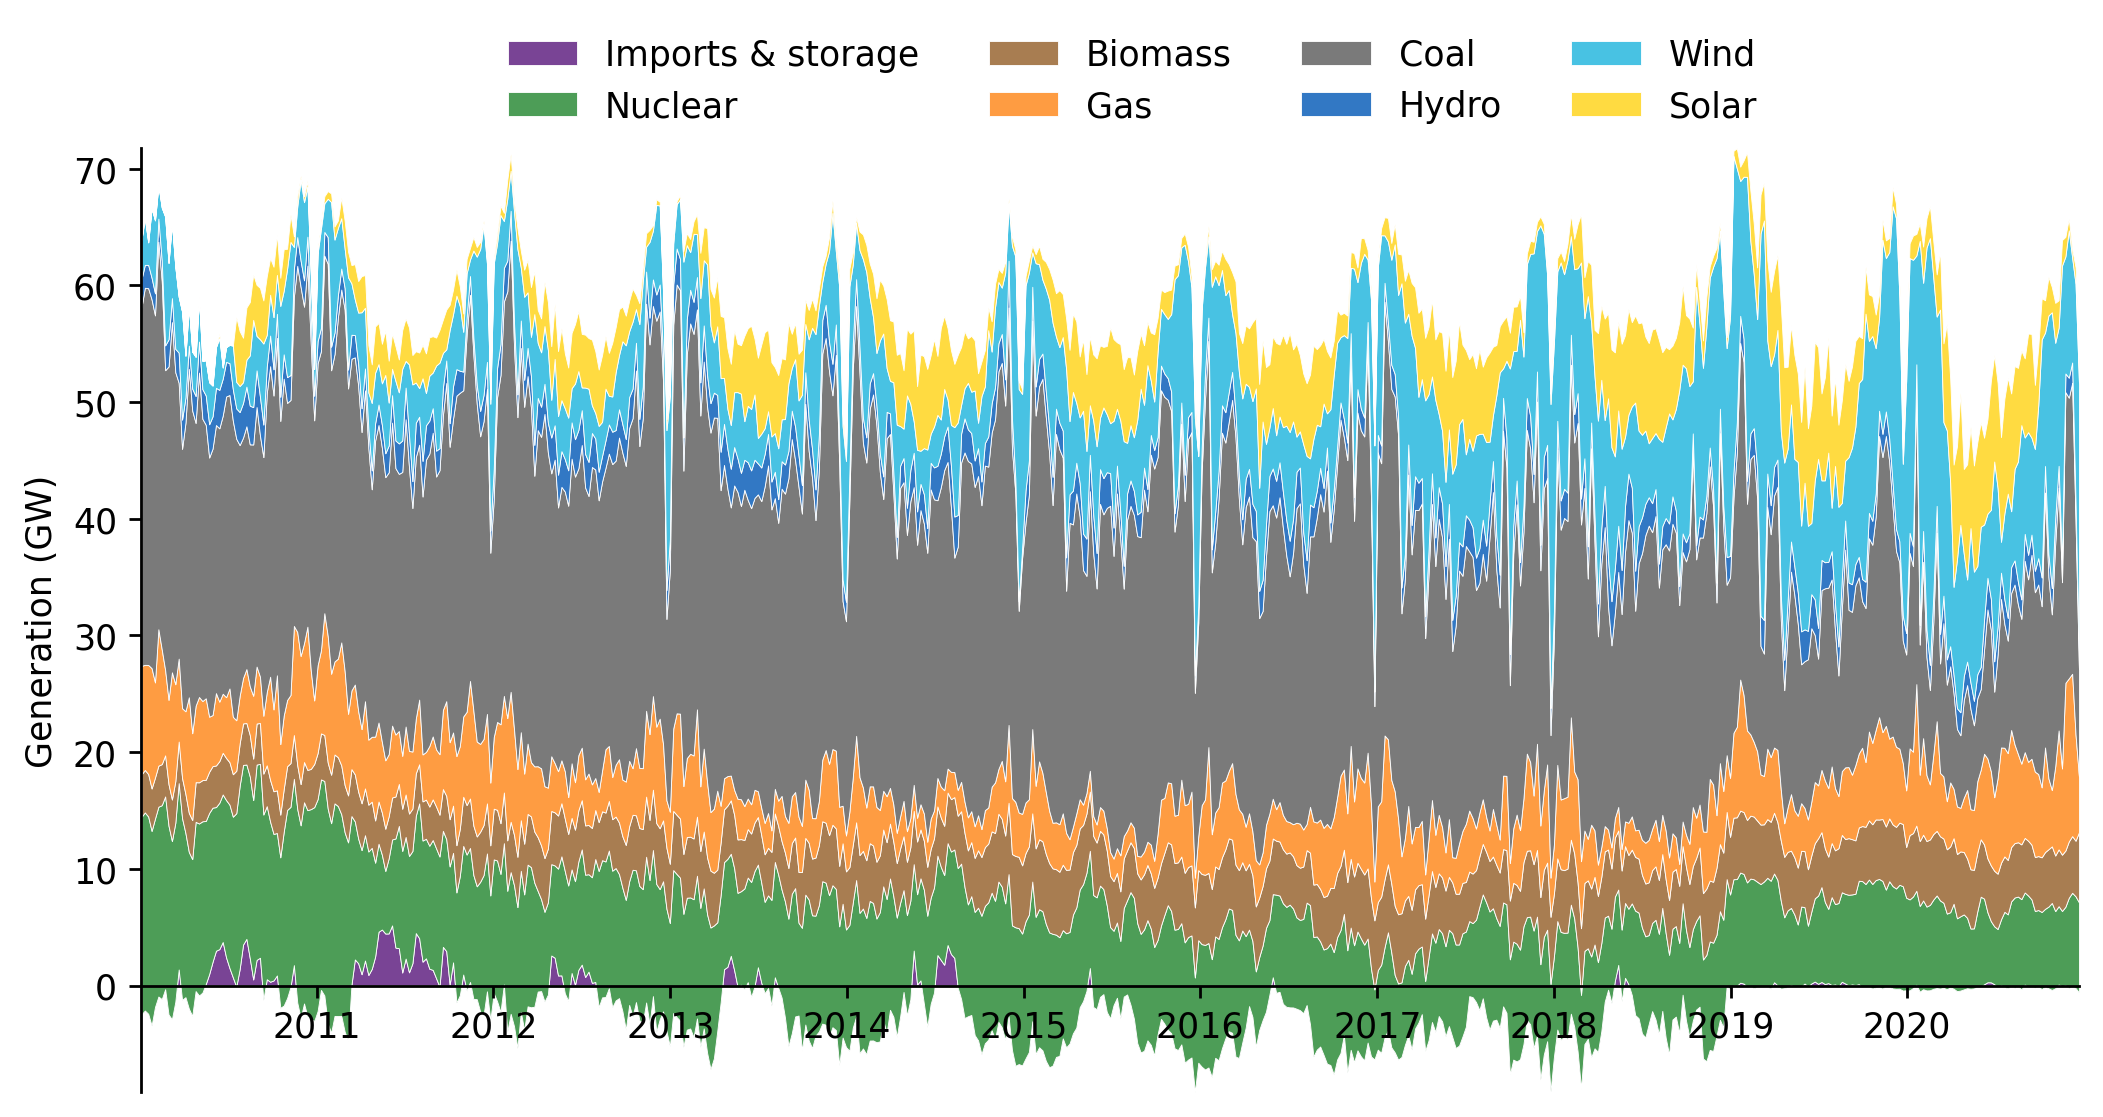

In [5]:
df_EC_plot = eda.clean_EC_df_for_plot(df_EC)
eda.stacked_fuel_plot(df_EC_plot, dpi=250)